# Linear  Regression using Mutli-Layer-Perceptron

In [1]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_pickle('data/df_encoded.pkl')
# df = pd.read_pickle('data/df_ground_truth.pkl')
df.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,is_weekend,month_April,...,month_November,month_October,month_September,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
datetime,,,,,,,,,,,,,,,,,,,,,
2004-10-03 18:00:00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,1,0,...,0,1,0,0,0,0,1,0,0,0
2004-10-03 19:00:00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,1,0,...,0,1,0,0,0,0,1,0,0,0
2004-10-03 20:00:00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,1,0,...,0,1,0,0,0,0,1,0,0,0
2004-10-03 21:00:00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,1,0,...,0,1,0,0,0,0,1,0,0,0
2004-10-03 22:00:00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,1,0,...,0,1,0,0,0,0,1,0,0,0


In [2]:
df['TxRH'] = df['T'] * df['RH']

In [3]:
y = df[['PT08.S1(CO)']]
X = df.drop(['PT08.S1(CO)'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=42)

## We will use all the columns ( ones engineered from the datetime index ) to see if we have a significant improvement. Also we will use Neural networks from sklearn's Multi Layer Preceptron to train our model

In [4]:
model = MLPRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/manoj/.virtualenvs/datascience/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/manoj/.virtualenvs/datascience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


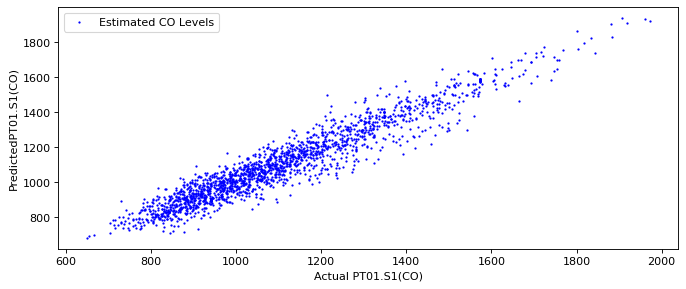

In [5]:
col_name='PT01.S1(CO)'
fig = plt.figure(dpi=80, figsize=(10, 4))
ax = fig.add_subplot(111)
ax.scatter(y_test, y_pred, c='b', label='Estimated CO Levels', s = 1)
ax.set_xlabel('Actual '+col_name)
ax.set_ylabel('Predicted'+col_name)
plt.legend()

In [6]:
print(model.score(X_test,y_test)*100,"%")

91.07457245257427 %


## This is much better score than linear regression. As you saw from the correlation matrix, features/columns which did not have much influence on the target columns. However in the case of neural networks, they were able to better capture these details, yeilding a score of 91%

In [7]:
num_samples = df.shape[0]
cutoff = (num_samples * 3) // 4
Xtrn = df.drop('PT08.S1(CO)', 1).iloc[:cutoff,:]
Ytrn = df['PT08.S1(CO)'].iloc[:cutoff]
Xval = df.drop('PT08.S1(CO)', 1).iloc[cutoff:,:]
Yval = df['PT08.S1(CO)'].iloc[cutoff:]


In [8]:
model = MLPRegressor(60, validation_fraction = 0, solver='lbfgs', max_iter= 400).fit(Xtrn, Ytrn)



/home/manoj/.virtualenvs/datascience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [9]:
coefs = model.coefs_
yhat = model.predict(X)
yhatval = model.predict(Xval)
loss = np.square(Yval - yhatval).mean()
hiddens = coefs[0].T
final_mlp = coefs[1].flatten()

In [10]:
coefs = list(zip([dict(zip(X.columns, h)) for h in hiddens],
                 [['output mult:', m] for m in  final_mlp.flatten()], 
                 [['intercept:', i] for i in  model.intercepts_[0]]))
print('loss:', loss)

for idx, c in enumerate(coefs):
    f1, o, i = c
    print('feature', idx, '=', f1['PT08.S2(NMHC)'].round(2), '* NMHC +', f1['PT08.S3(NOx)'].round(2), '* NOx', '+', i[1].round(2))
    
output = 'yhat = '
for fidx, v in enumerate(final_mlp):
    output = output + str(v.round(2)) + ' * feat ' + str(fidx) + ' + '
output = output + str(model.intercepts_[1][0].round(2))
print(output)

loss: 15163.782109368596
feature 0 = 0.1 * NMHC + -0.11 * NOx + -0.05
feature 1 = -0.13 * NMHC + 0.16 * NOx + -0.24
feature 2 = -0.05 * NMHC + 0.07 * NOx + 0.24
feature 3 = 0.58 * NMHC + 0.18 * NOx + 0.1
feature 4 = 0.05 * NMHC + -0.05 * NOx + -0.01
feature 5 = 0.15 * NMHC + -0.22 * NOx + 0.04
feature 6 = 0.07 * NMHC + 0.37 * NOx + -0.2
feature 7 = -0.23 * NMHC + 0.08 * NOx + 0.02
feature 8 = 0.29 * NMHC + -0.19 * NOx + -0.05
feature 9 = -0.1 * NMHC + 0.27 * NOx + 0.06
feature 10 = -0.32 * NMHC + 0.11 * NOx + -0.24
feature 11 = -0.25 * NMHC + -0.04 * NOx + -0.07
feature 12 = -0.2 * NMHC + -0.11 * NOx + -0.03
feature 13 = -0.72 * NMHC + -0.56 * NOx + -0.21
feature 14 = -0.21 * NMHC + -0.12 * NOx + -0.07
feature 15 = -0.69 * NMHC + 0.11 * NOx + 0.17
feature 16 = -0.72 * NMHC + 0.55 * NOx + 0.14
feature 17 = 0.51 * NMHC + 0.35 * NOx + -0.18
feature 18 = 0.22 * NMHC + 0.03 * NOx + 0.25
feature 19 = -0.19 * NMHC + -0.09 * NOx + -0.07
feature 20 = 0.46 * NMHC + 0.17 * NOx + 0.18
feature 21 =